# Ingeniería de features de las propiedades en venta.
La idea de este notebook es que comencemos a pensar como procesar los features del Dataset de Properatti que utilizaron para la primer entrega. La ingenieria de features lleva mucho tiempo y trabajo. En esta actividad les presentamos algunas buenas prácticas y les sugerimos algunas ideas, pero queda mucho por hacer! Les invitamos a seguir procesándolo en sus casas :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
properati = pd.read_csv('datos_properati.csv', delimiter=',', parse_dates = ['created_on'])

In [3]:
#properati.property_type.apply(lambda x: np.where(x =='Departamento', 0, 1).head()

In [4]:
properati.dtypes

created_on                 datetime64[ns]
operation                          object
property_type                      object
place_with_parent_names            object
lat-lon                            object
lat                               float64
lon                               float64
price_aprox_usd                   float64
surface_total_in_m2               float64
surface_covered_in_m2             float64
price_usd_per_m2                  float64
floor                             float64
rooms                             float64
expenses                          float64
properati_url                      object
barrio                             object
comuna                            float64
dtype: object

## 1- Amigarse con el Dataset

**a)** Indica a qué grupo pertenece las variables de cada columna del Dataset, siendo los grupos:

- Numéricas. 
- Categóricas Nominales.
- Categóricas Ordinales.
- Fechas - Hora - Ubicacion.

Por ejemplo, la columna "lat" tiene variables del tipo " Fechas - Hora - Ubicacion"


In [5]:
#for col in properati.columns:
#    print(col)
    
for indice, elemento in enumerate(properati.columns):
    print(indice, elemento)

0 created_on
1 operation
2 property_type
3 place_with_parent_names
4 lat-lon
5 lat
6 lon
7 price_aprox_usd
8 surface_total_in_m2
9 surface_covered_in_m2
10 price_usd_per_m2
11 floor
12 rooms
13 expenses
14 properati_url
15 barrio
16 comuna


In [6]:
tipo_variable = [None]*len(properati.columns)
tipo_variable[5] = 'Fechas - Hora - Ubicacion'

for orden,col in enumerate(properati.columns):
    print('{} - En la columna "{}" tenemos variables de tipo "{}" \n'.format(orden,col,tipo_variable[orden]))

0 - En la columna "created_on" tenemos variables de tipo "None" 

1 - En la columna "operation" tenemos variables de tipo "None" 

2 - En la columna "property_type" tenemos variables de tipo "None" 

3 - En la columna "place_with_parent_names" tenemos variables de tipo "None" 

4 - En la columna "lat-lon" tenemos variables de tipo "None" 

5 - En la columna "lat" tenemos variables de tipo "Fechas - Hora - Ubicacion" 

6 - En la columna "lon" tenemos variables de tipo "None" 

7 - En la columna "price_aprox_usd" tenemos variables de tipo "None" 

8 - En la columna "surface_total_in_m2" tenemos variables de tipo "None" 

9 - En la columna "surface_covered_in_m2" tenemos variables de tipo "None" 

10 - En la columna "price_usd_per_m2" tenemos variables de tipo "None" 

11 - En la columna "floor" tenemos variables de tipo "None" 

12 - En la columna "rooms" tenemos variables de tipo "None" 

13 - En la columna "expenses" tenemos variables de tipo "None" 

14 - En la columna "properati_url"

**b-** Indica qué columnas tienen NaNs. En caso de tenerlos, cuántos

In [7]:
# Respuesta
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

properati.info()
draw_missing_data_table(properati)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_on               18979 non-null  datetime64[ns]
 1   operation                18979 non-null  object        
 2   property_type            18979 non-null  object        
 3   place_with_parent_names  18979 non-null  object        
 4   lat-lon                  18979 non-null  object        
 5   lat                      18979 non-null  float64       
 6   lon                      18979 non-null  float64       
 7   price_aprox_usd          17445 non-null  float64       
 8   surface_total_in_m2      16586 non-null  float64       
 9   surface_covered_in_m2    16876 non-null  float64       
 10  price_usd_per_m2         16037 non-null  float64       
 11  floor                    2756 non-null   float64       
 12  rooms                    13517 n

,Total,Percent
floor,16223,0.854787
expenses,15164,0.798988
rooms,5462,0.287792
price_usd_per_m2,2942,0.155013
surface_total_in_m2,2393,0.126087
surface_covered_in_m2,2103,0.110807
price_aprox_usd,1534,0.080826
lat-lon,0,0.000000
operation,0,0.000000
property_type,0,0.000000


## 2- Manejo de NaNs.
Muchas veces no queremos eliminar las instancias que posean NaNs en algun atributo / feature. 


**a)** Les proponemos utilizar el imputer de Scikit-learn para reemplazar los valores faltantes con algún indicador estadústico. Por ejemplo, en la columna "price_usd_per_m2" podemos reemplazar los valores faltantes por la mediana (les parece correcta esta elección?).

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='median')# missing_values=np.nan, 
## Completar con la instruccion fit_transform. Utilizar como argumento properati[['price_aprox_usd']]
properati_price_imp = imp.fit_transform(properati[['price_aprox_usd']])

In [9]:
print(imp.statistics_)
draw_missing_data_table(properati)
properati[['price_aprox_usd']].median()

[180000.]


price_aprox_usd    180000.0
dtype: float64

**b)** Chequear cuántas columnas tiene la variable "properati_price_imp". Tiene algún NaN?

In [10]:
### Respuesta
print(properati_price_imp.shape)
np.isnan(properati_price_imp).sum()

(18979, 1)


0

**c)** Reemplazar los valores de la columna "properati['price_aprox_usd']"  por los valores de la variable "properati_price_imp".

In [11]:
### Respuesta
properati['price_aprox_usd']=properati_price_imp

**d)** Responder:
    - Cuáles son ahora las instancias con valores faltantes?
    - Se modificó la mediana de la columna 'price_aprox_usd'? Por qué?
    - Proponer (y NO efectuar) una estrategia para procesar otra columna con valores faltantes.

In [12]:
properati['price_aprox_usd'].median()

180000.0

**e)** Eliminar el resto de las features que tienen valores faltantes. 

In [13]:
properati.dropna(how='any').head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
137,2017-09-10,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5708522,-58.4411794",-34.570852,-58.441179,270000.0,185.0,80.0,1459.459459,1.0,3.0,5400.0,https://www.properati.com.ar/1el0x_venta_depar...,PALERMO,14.0
140,2017-09-10,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hol...,"-34.5832058,-58.4334675",-34.583206,-58.433468,123000.0,32.0,29.0,3843.750000,3.0,1.0,2600.0,https://www.properati.com.ar/1el2s_venta_depar...,PALERMO,14.0
176,2017-09-13,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5630665,-58.4383467",-34.563066,-58.438347,268000.0,82.0,74.0,3268.292683,7.0,3.0,6400.0,https://www.properati.com.ar/1epbt_venta_depar...,PALERMO,14.0
177,2017-09-13,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5630665,-58.4383467",-34.563066,-58.438347,268000.0,84.0,76.0,3190.476190,7.0,3.0,6400.0,https://www.properati.com.ar/1epbu_venta_depar...,PALERMO,14.0
180,2017-09-13,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5808658,-58.4384065",-34.580866,-58.438406,312000.0,98.0,91.0,3183.673469,2.0,4.0,9500.0,https://www.properati.com.ar/1epdp_venta_depar...,PALERMO,14.0


## 3- Extrayendo informacion util

Los algoritmos de aprendizaje automático que utilizaremos reconocerán patrones en los atributos (o combinaciones de ellos) que les introduzcamos. Entonces, la calidad de funcionamiento del algoritmo esta íntimamente relacionada al preprocesamiento de estos atributos. 


En este caso, las variables del grupo "Fechas - Hora - Ubicacion" pocas veces nos dan la información que queremos y muchas veces hay que reescribirlas. Les proponemos crear **nuevas features** de las cuales sea mas fácil extraer informacion. 


**a)** Les proponemos crear 3 features nuevas, una con el año en que fue publicada cada casa, otra con el mes, y otra con el día. Tomamos como materia prima la información de la columna 'created_on'.

Les mostramos un ejemplo creando la columna "anio", y les proponemos que hagan "mes" y "dias" por su cuenta.

In [14]:
properati['anio'] = pd.DataFrame((properati['created_on'].map(lambda x: x.year)))


### 4- Manipulación de variables categóricas nominales (o dummies).
Usando LabelEncoder de Scikit-learn podemos transformar nuestras variables categóricas en numéricas sin pasar por variables dummies. Luego, vamos a utilizar OneHotEncoder para transformar las categorías numéricas en categorías binarias.


Nos centraremos en la columna 'property_type'.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

 
(properati['property_type']).head()


0    house
1    store
2    store
3    store
4    store
Name: property_type, dtype: object

In [16]:
# Llamamos al algoritmo
le_prop_type = LabelEncoder()
# Lo fiteamos con las categorias que tenemos en nuestro dataset.
le_prop_type.fit(properati['property_type'])

LabelEncoder()

In [17]:
# Estas son las categorias que eligio el algoritmo. Les asignara un numero a cada categoria, 
# yendo de izquierda a derecha [recordemos que python cuenta desde 0]
le_prop_type.classes_

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [18]:
#Transformamos la categoria "property_type" en numeros.
cat_prop_type = le_prop_type.transform(properati['property_type'])

[2 3 3 ... 3 1 1]


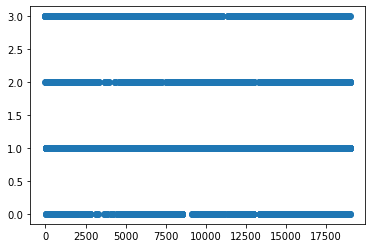

In [19]:
#Les proponemos formas de visualizar que hizo sckit-learn
print(cat_prop_type)
plt.plot(cat_prop_type,'o')

In [20]:
# Actualizamos el viejo dataset
#properati['property_type'] = cat_prop_type

Ahora vamos a transformar las categorías numéricas que acabamos de definir, en binarias. De lo contrario, el algoritmo de ML que vayamos a usar las interpretaria como variables categoricas ordinales [y no lo son!].

In [21]:
onehot_encoder = OneHotEncoder(sparse = False)
# No olvidemos que hay que cambiarle las dimensiones al set de etrenamiento del OneHotEncoder!
cat_prop_type_rs = cat_prop_type.reshape(-1,1)
print(cat_prop_type_rs)

[[2]
 [3]
 [3]
 ...
 [3]
 [1]
 [1]]


In [22]:
#Como estamos cancheres, realizamos directamente el fit y transform juntos!
cat_prop_type_encoded = onehot_encoder.fit_transform(cat_prop_type_rs)
print(cat_prop_type_encoded)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


**a)** RESPONDER:

    - Por qué la variable 'cat_prop_type_encoded' tiene esa forma? Qué significa cada cosa? 
    - Podriamos haber usado el OneHotEncoder sin utilizar primero el LabelEncoder?

In [23]:
print(cat_prop_type_encoded)
#cada columna es una categoría
#si se podría haber usado solo OneHotEncoder

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


**b)** Scikit-learn tiene una excelente documentacion. Te proponemos que lo chequees por vos misme. Te proponemos que explores https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html. Qué funciones tiene? Qué te parece que hace la función *inverse_transform*?

In [24]:
#TE VUELVE A MOSTRAR LAS CATEGORÍAS